**Course website**: http://www.leouieda.com/matematica-especial

**Note**: This notebook is part of the course "Matemática Especial I" of the [Universidade do Estado do Rio de Janeiro](http://www.uerj.br/). All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

# Integração Numérica

## Imports

Coloque **todos** os `import` na célula abaixo. Não se esqueça do `%matplotlib inline` para que os gráficos apareçam no notebook.

In [2]:
# Dessa vez vamos precisar da biblioteca matemática "math"
# Ela define funções como sin, cos, tan, exp e constantes como pi
import math
%matplotlib inline
import matplotlib.pyplot as plt

## Regra dos retângulos

O jeito mais simples de integração numérica é a regra dos retângulos. Nela, aproximamos a integral pela soma das áreas de retângulos. Cada retângulo se encontra abaixo de um dos pontos dos dados. A largura do retângulo é o espaçamento entre os dados $\Delta$. A altura do retângulo é o valor do dado naquela posição $d_i$.

Se tivermos nossos dados em um vetor de dados $\bar{d}$ (**nota**: vetores serão representados com uma barra em cima):

$$
\bar{d} = \left[ d_1 ~ d_2 ~ d_3 ~ \ldots ~ d_N \right],
$$

a integral poderá ser aproximada pela soma das áreas dos retângulos:

$$
A = \sum\limits_{i=1}^{N} \Delta d_i
$$

### Algoritmo

Utilize a célula vazia abaixo (tipo Markdown) para colocar uma descrição do algoritmo em português (não em código). Não se esqueça de relacionar os passos do algoritmo com as fórmulas matemáticas do método.

**Dicas**:

* Help sobre Markdown: https://help.github.com/articles/markdown-basics/
* Como utilizar fórmulas matemáticas: https://www.sharelatex.com/learn/Mathematical_expressions


Para calcular uma aproximação da integral procede-se da seguinte maneira:
1- Divide-se a área do intervalo de integração que vai de a até b, em n retângulos iguais;
2- Calcula-se a base de cada retângulo (var intervalo) que está sobre o eixo x e tem o mesmo valor que é igual a intervalo=(b-a)/(n-1) 
3- Calcula-se as áreas de todos os retângulos que será feita da seguinte maneira:
a) determina-se o valor de x para o cálculo das alturas que será dado por x=[a, a + intervalo, a + 2 * intervalo, ..., a + (n - 1) * intervalo];
b) calcula-se a altura que corresponde ao valor de f(x) no ponto x;
c) calcula-se a área de cada retângulo que será f(x)*intervalo
4- Calcula-se, finalmente, a aproximação da integral, somando as áreas de todos os retângulos. 

### Dados para teste

Vamos utilizar dados gerados a partir de uma função $d(t) = \cos(t)$ para testar o método de integração. A vantagem do cosseno é que sabemos quanto deve ser a integral:

$$
\int\limits_a^b \cos(t) dt = \sin(b) - \sin(a)
$$

O código abaixo gera duas listas: uma com os tempos variando entre os limites de integração; outra com os valores correspondentes do cosseno.

In [3]:
# inicio e fim são os intervalos de integração
inicio = 0
fim = math.pi/2 # Funções trigonométricas utilizam ângulos em radianos!
N = 50
# Precisamos saber o intervalo entre cada ponto dos dados
# A divisão é por N - 1 pois existem N - 1 intervalos entre N pontos
intervalo = (fim - inicio)/(N - 1)
print("Espaçamento entre os dados:", intervalo)
tempos = []
dados = []
for i in range(N):
    t = inicio + i*intervalo
    tempos.append(t)
    dados.append(math.cos(t))

Espaçamento entre os dados: 0.0320570678937734


Utilize a célula abaixo para gerar um gráfico de `dados` por `tempos`.

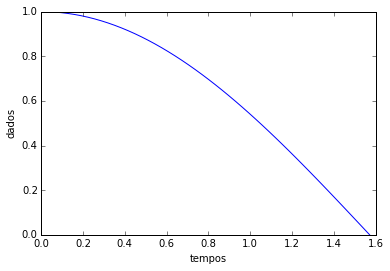

In [4]:
plt.figure()
plt.plot(tempos,dados)
plt.xlabel("tempos")
plt.ylabel("dados")

### Implementação

Implemente a regra dos retângulos para integrar os dados gerados acima. Coloque seu cógido na célula abaixo.

In [6]:
integral = 0
for i in range(N):
    integral = integral + intervalo*dados[i]
print (integral)

1.01594289451325


Nas células abaixo calcule e imprima:

1. A solução analítica (verdadeira) para a integral
2. O erro cometido $E = \left|res_{true} - res_{calc}\right|$

Dica: a função `abs` calcula o valor absoluto de um número.

In [7]:
integralverdadeira = math.sin(fim)- math.sin(inicio) 
print(integralverdadeira)

1.0


In [8]:
erro = abs(integralverdadeira - integral)
print(erro)

0.01594289451325004


**Responda na célula abaixo:** Por que o erro não é zero e quais são os fatores que influenciam o erro?

O erro não é zero porque a integral é um valor aproximado. Os valores que influenciam o erro são devido ao fato que os retângulos não estão totalmente encaixados dentro do intervalo de integração.

### Resultado esperado

No caso acima estamos integrando o cosseno de 0 a $\pi/2$, então o valor esperado da integral é 1. Seu resultado não será exatamente 1 mas deve estar entre 0.9 e 1.1.

## Regra dos trapézios

A regra dos trapézios é parecida com a regra dos retângulos. Mas utilizaremos a área de um trapézio ao invés da área de um retângulo. O trapézio será definido com base em dois pontos adjacentes nos dados ($d_i$ e $d_{i+1}$, por exemplo).

$$
A = \sum\limits_{i=1}^{N - 1} \Delta \frac{d_i + d_{i+1}}{2}
$$

### Algoritmo

Descreva abaixo o algoritmo utilizado (em português) para fazer a integração numérica utilizando a regra dos trapézios.

Para se calcular uma aproximação da integral utilizando a regra dos trapézios, procede-se da seguinte maneira:



### Implementação

Vamos utilizar os mesmo dados utilizados na regra dos retângulos (na dúvida, rode novamente a célula que gera os dados). Abaixo, escreva e rode o código que faz a integração numérica com a regra dos trapézios. 

In [9]:
integraltrapezio = 0
for i in range(N-1):
    integraltrapezio = integraltrapezio + intervalo*(dados[i]+dados[i+1])/2
print (integraltrapezio)

0.9999143605663631


Calcule e imprima também a solução analíca e o erro cometido.

In [10]:
errotrapezio = abs(integralverdadeira - integraltrapezio)
print(errotrapezio)

8.563943363693038e-05


**Responda na célula abaixo:** O erro é maior ou menos que para a regra dos retângulos? Por que? Você esperava isso?

O erro é menor porque a aproximação por trapézio é mais precisa.

### Resultado esperado

Novamente, o valos esperado é 1 mas seu resultado não será exatamente 1 (mas deve estar entre 0.9 e 1.1).

## Comparação dos dois métodos

Vamos comparar o erro de ambos métodos. Uma comparação muito utilizada em métodos numéricos em geral é como o erro varia com o número de dados (ou pontos) utilizados.

Nas células abaixo, calcule o erro da integração numérica para diferentes valores de `N`. Os valores de N deverão variar de 10 a 1000 de 10 em 10. Mantenha os intervalos de integração entre $0$ e $\pi/2$. Faça esse cálculo para os dois métodos: retângulos e trapézios.

Ao final, faça um gráfico do erro pelos valores de `N`. O gráfico deverá ter duas curvas, uma para cada método. O eixo y (erros) deverá estar em escala logarítmica.

**Dicas**: 

* Gere uma lista dos valores de `N`.
* Para colocar o eixo y em escala log: `plt.yscale('log')`

In [16]:
lista = []
for i in range (10,1010,10):
    lista.append(i)
print(lista)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000]


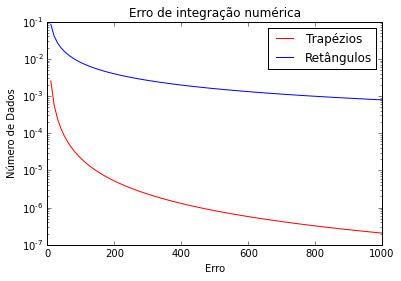

In [32]:
inicio = 0
fim = math.pi/2 # Funções trigonométricas utilizam ângulos em radianos!
integralverdadeira = math.sin(fim)- math.sin(inicio) 
listaerro = []
listaerrotrapezio = []
for N in lista:
    intervalo = (fim - inicio)/(N - 1)
    tempos = []
    dados = []
    for i in range(N):
        t = inicio + i*intervalo
        tempos.append(t)
        dados.append(math.cos(t))
    integral = 0
    for j in range(N):
        integral = integral + intervalo*dados[j]
    integraltrapezio = 0
    for k in range(N-1):
        integraltrapezio = integraltrapezio + intervalo*(dados[k]+dados[k+1])/2
    erro = abs(integralverdadeira - integral)
    errotrapezio = abs(integralverdadeira - integraltrapezio)
    listaerro.append(erro)
    listaerrotrapezio.append(errotrapezio)
plt.figure()
plt.plot(lista,listaerrotrapezio, "r" , label = "Trapézios")
plt.yscale ('log')
plt.plot(lista,listaerro, label = "Retângulos")
plt.xlabel("Erro")
plt.ylabel("Número de Dados") 
plt.legend()
plt.title ("Erro de integração numérica")

**Responda na célula abaixo**: Como o erro varia com `N` para os dois métodos? Aumentar o número de dados de 50 para 200 nos dá a mesma diminuição no erro que aumentar de 650 para 800? Sempre vale a pena utilizar mais dados (lembre-se que a escala é logarítmica)? 

### Resultado esperado

O gráfico ao final deverá ser parecido com:

![images/erro-por-ndados.png](images/erro-por-ndados.png)

## Tarefa bônus: Probabilidades

Vamos assumir que uma variável aleatória $x$ segue uma [distribuição normal](https://en.wikipedia.org/wiki/Normal_distribution) com média zero e desvio padrão $\sigma$. Isso quer dizer que a [densidade de probabilidade](https://en.wikipedia.org/wiki/Probability_density_function) para $x$ é

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp \left( -\frac{x^2}{2 \sigma^2} \right)
$$

A probabilidade de $x$ cair no intervalo $[a, b]$ é dada por ([refência](https://en.wikipedia.org/wiki/Probability_distribution#Continuous_probability_distribution)):

$$
P(a \leq x \leq b) = \int\limits_a^b f(x) dx
$$

Calcule na célula abaixo qual é a probabilidade de $x$ estar entre $[-\sigma, +\sigma]$ para $\sigma = 5$.